#### Prepared by: Noura Medhat & Omar El-Sayed

#     
# Naive Bayes

### What is Naive Bayes?
#### It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

#####     
### What is Bayes' Theorem?
#### The Bayes' Theorem is a mathematical method for determining conditional probability, named after 18th-century British mathematician Thomas Bayes. The likelihood of an outcome occurring depending on a previous outcome under similar circumstances is known as conditional probability. Given new or more evidence, Bayes' theorem can be used to alter previous forecasts or theories (update probability). 
## 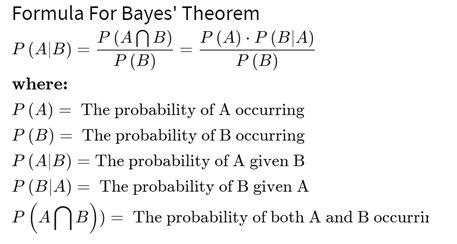


# But why is it called ‘Naive’?

The name naive is used because it assumes the features that go into the model is independent of each other. That is changing the value of one feature, does not directly influence or change the value of any of the other features used in the algorithm.

Alright. By the sounds of it, Naive Bayes does seem to be a simple yet powerful algorithm. But why is it so popular?

That’s because there is a significant advantage with NB. Since it is a probabilistic model, the algorithm can be coded up easily and the predictions made real quick. Real-time quick.
Because of this, it is easily scalable and is traditionally the algorithm of choice for real-world applications (apps) that are required to respond to user’s requests instantaneously.

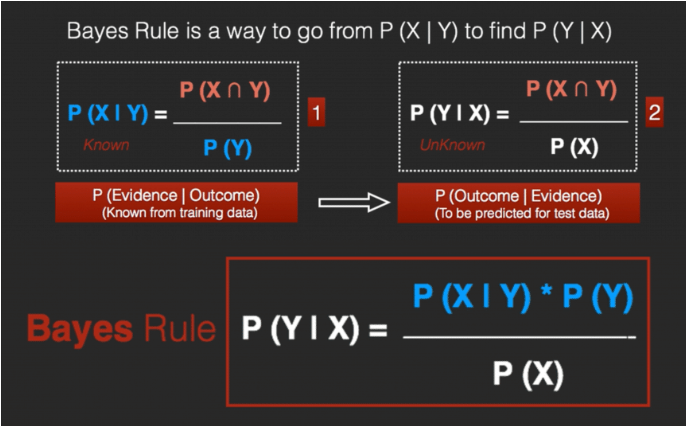

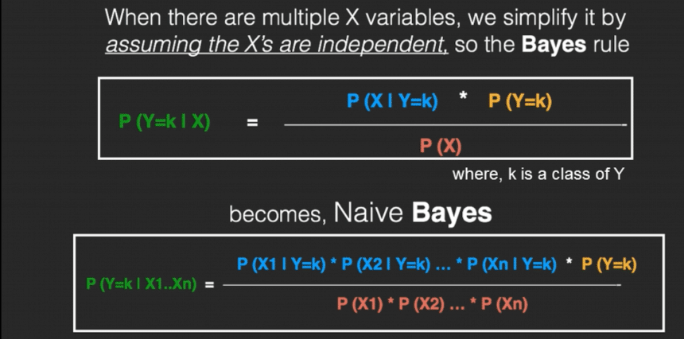

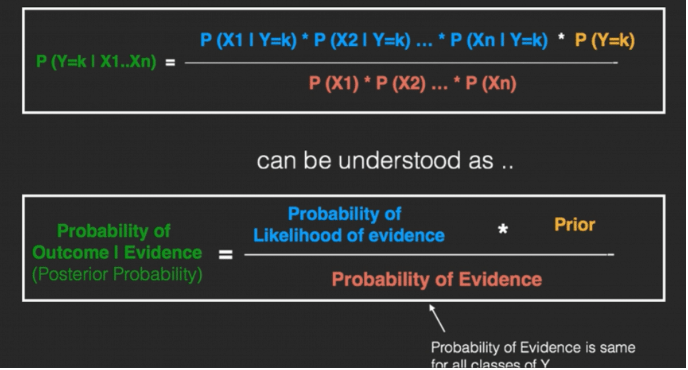

#### In technical words, the left-hand-side (LHS) of the equation is understood as the posterior probability or simply the posterior .

#### The RHS has 2 terms in the numerator. The first term is called the ‘Likelihood of Evidence’. It is nothing but the conditional probability of each X’s given Y is of particular class ‘c’. Since all the X’s are assumed to be independent of each other, you can just multiply the ‘likelihoods’ of all the X’s and called it the ‘Probability of likelihood of evidence’.

# Steps for calculations :
#### 1 -  Compute the ‘Prior’ probabilities for each of the classes
#### 2 - Compute the probability of evidence that goes in the denominator.
#### 3 - Compute the probability of likelihood of evidences that goes in the numerator. 
#### 4 -  Substitute all the 3 equations into the Naive Bayes formula, to get the probability of the class.
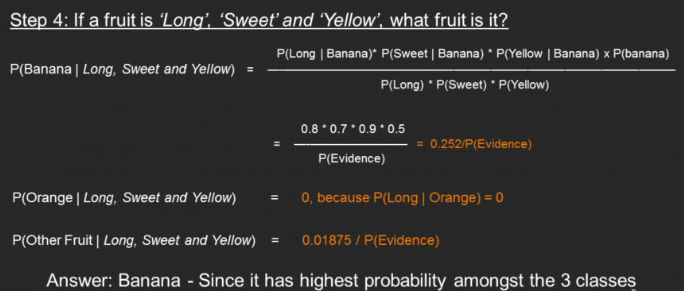

# What to do if the features are continuos?
If we assume that the X follows a particular distribution, then you can plug in the probability density function of that distribution to compute the probability of likelihoods.

If you assume the X’s follow a Normal (aka Gaussian) Distribution, which is fairly common, we substitute the corresponding probability density of a Normal distribution and call it the Gaussian Naive Bayes.
You need just the mean and variance of the X to compute this formula.
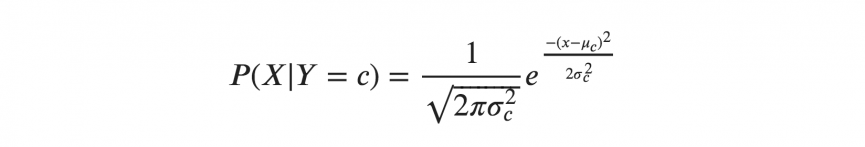

#### there's alot of ways to convert variables' shape into normal distribution but it will be discussed in statistics for ds.

# Advantages and Disadvantages of Naive Bayes
## Advantages
This algorithm works quickly and can save a lot of time. 

For multi-class prediction issues, Naive Bayes is a good choice. If the premise of feature independence remains true, it can outperform other models while using far less training data. Categorical input variables are more suited to Naive Bayes than numerical input variables.

Naive Bayes is suitable for solving multi-class prediction problems. 

If its assumption of the independence of features holds true, it can perform better than other models and requires much less training data. 

Naive Bayes is better suited for categorical input variables than numerical variables.

## Disadvantages

Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.

This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset.

It would be best if you used a smoothing technique to overcome this issue.

Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 
# Can be Used for :
Text Classification

Sentiment Analysis

Recommender Systems


####  
### Naive Bayes example:
#### If we want to classify a batch of emails into regular emails and spam emails, we'll look for the most common words and compute the likelihood of that word appearing in a normal email vs a spam email, and then we'll be able to classify the emails as spam or normal.

###      
### Creating a Naive Bayes classifier using Python

#### Step One: Importing the important libraries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.naive_bayes import MultinomialNB

#### Step Two: Loading our dataset

In [2]:
data = pd.read_csv ("/home/noura/emails.csv")
data.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\nth...
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a..."
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\nthis deal is to ...


In [3]:
data.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    3672   3531  Subject: calpine daily gas nomination\n>\nrick...   20
spam   1499   1462                                        Subject: \n   16

#### Here we have 2 labels: ham (for normal emails) and spam (for spam emails). In machine learning we don't deal with strings so we are going to give spam emails 1 and the ham emails 0 as follows:

In [4]:
data['spam']=data['label'].apply(lambda x: 1 if x=='spam' else 0)
data.head()

,label,text,spam
0,ham,Subject: enron methanol ; meter # : 988291\nth...,0
1,ham,"Subject: hpl nom for january 9 , 2001\n( see a...",0
2,ham,"Subject: neon retreat\nho ho ho , we ' re arou...",0
3,spam,"Subject: photoshop , windows , office . cheap ...",1
4,ham,Subject: re : indian springs\nthis deal is to ...,0


#### Step Three: Spliting our dataset into training dataset and test dataset

In [5]:
#test_size = 0.30 means that 30% of our dataset will be for the test 
X_train, X_test, y_train, y_test = train_test_split(data.text,data.spam, test_size=0.30)

#### Step Four: Converting the words in the email to features

In [6]:
v = CountVectorizer()
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#### We used (from sklearn.feature_extraction.text import CountVectorizer) to accomplish step four and this will help us to build our classifier. For further information: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

#### Step Five: Building our Naive Bayes classifier

In [7]:
NBmodel = MultinomialNB()
NBmodel.fit(X_train_count,y_train)

MultinomialNB()

#### Now our model is ready to predict.

#### Step six: Using the model for prediction

In [8]:
emails = [
    'Hey Noureen, can we get together to watch a movie tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
emails_count = v.transform(emails)
NBmodel.predict(emails_count)

array([0, 1])

#### The output means that the first email is ham -normal email- and the second one is spam.

#####      
#### The dataset: https://www.kaggle.com/datasets/venky73/spam-mails-dataset